In [62]:
import pandas as pd
import nltk

from tqdm import tqdm
from google_play_scraper import Sort, reviews, app
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from textblob import TextBlob
from datetime import datetime, timedelta

In [63]:
# app_packages = [
#     'com.gojek.app',
#     'com.grabtaxi.passenger',
#     'com.taxsee.taxsee'
# ]

# app_infos = []

# for application in tqdm(app_packages):
#     info = app(application, lang='id', country='id')
#     del info['comments']
#     app_infos.append(info) 

In [64]:
# app_reviews = []
# start_date = datetime(2023, 1, 1)
# end_date = datetime(2023, 5, 1)
# start_timestamp = int(start_date.timestamp() * 1000)
# end_timestamp = int(end_date.timestamp() * 1000)

# for ap in tqdm(app_packages):
#     for score in list(range(1, 6)):
#         for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
#             rvs, _ = reviews (
#                 ap,
#                 lang='id',
#                 country='id',
#                 sort=sort_order,
#                 count=(500 if score == 3 else 400),
#                 filter_score_with=score
#             )     

#             for r in rvs:
#                 r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
#                 r['appId'] = ap

#             app_reviews.extend(rvs)

In [65]:
# data = pd.DataFrame(app_reviews)
# data = data.sort_values(['appId', 'at'])
# data.to_csv('data_google.csv', index=False)
# data.iloc[0]

In [66]:
# data = data[['at','userName','score','content',]].sort_values(by=['at','score'], ascending=True).reset_index(drop=True)
# data.head()

In [67]:
data = pd.read_csv('data_google.csv')
data.sample(7)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
7648,96414c17-2412-40f3-a7ee-28a85dfa4514,Fahrudi,https://play-lh.googleusercontent.com/a-/AD_cMMRP_S2SmccS2J0r65Yy7BhcE2Zi7WwiCcClsEWipvJjDw,Sangat membantu,4,0,5.265.0,2023-08-17 20:53:14,"Hai Kak. Enjoy ya Kak.\nOh iya, jika Kakak merasa puas menggunakan layanan Grab, boleh diberikan rating 5 ya Kak. Terima kasih 😊🙏",2023-08-18 01:38:38,5.265.0,newest,com.grabtaxi.passenger
7282,e22c2642-8531-4949-8565-72b3bb2df515,Gb Jkt,https://play-lh.googleusercontent.com/a/AAcHTtc7iAdZzrkVPnk29NKjT9jCAGIJAyBrt_yMH2-JsBlu=mo,salam satu aspal,4,0,5.265.0,2023-08-11 21:27:37,NaN,NaN,5.265.0,newest,com.grabtaxi.passenger
8244,a04d4aad-36c8-4ff3-b30b-aabec384159c,Mofumofu,https://play-lh.googleusercontent.com/a-/AD_cMMTPcngcTQ-0U2Ap1fmF8e4KesG-c7WFbPh1GoSza7mjL0Vs,"Payah gk bisa mantau posisi driver dimana pas pesen makanan, cuman nampilin status doang itu gk guna, gw cuman mau tau driver lagi ada dimana",1,2,5.266.0,2023-08-22 17:54:24,NaN,NaN,5.266.0,most_relevant,com.grabtaxi.passenger
5297,cd0aa545-95de-48a2-ba7a-2a9cc9a1adb2,Widayat Azka,https://play-lh.googleusercontent.com/a/AAcHTtcX7kXVMKw09oSZMNS6Xxu1uwT7-PnzHp4uGhPf9-_2=mo,"Maaf . Pesan grabfood bayak biaya2.. Parah.. yg biaya kemasan,pesan'n pajak ongkir, dll.. kasihan driver'y dah ngabil, nunggu kadang2 smpai 1 jam ongkir dpt 9800k. Untk pemesan grabfood makan'n jadi'y mahal... Nguntungin yg punya aplikasi doang... Kalau bisa biaya2 yg lain di kurangin.. Bwt tamban'n driver...",2,3,5.256.0,2023-06-06 11:44:53,Halo Kak. Maaf ya buat engga nyaman 🙇‍♀️\nApabila Kakak menemukan kendala pada penggunaan aplikasi Grab Penumpang maka silakan laporkan melalui link https://grb.to/consumeridhelpcenter agar bisa ditindaklanjuti ya.Terima kasih 🙏,2023-06-06 14:03:04,5.256.0,most_relevant,com.grabtaxi.passenger
5488,302e3fdc-605a-4281-88a8-7110cbf4aeaf,Adi Ardiansyah,https://play-lh.googleusercontent.com/a/AAcHTtfJAv_2BpzJPP8XtyVfWb44RPVtcgL3BoXmpkb7oJXo=mo,buruk,2,0,5.250.1,2023-06-15 19:20:45,Halo Kak. Maaf ya buat engga nyaman 🙇‍♀️\nApabila Kakak menemukan kendala pada penggunaan aplikasi Grab Penumpang maka silakan laporkan melalui link https://grb.to/consumeridhelpcenter agar bisa ditindaklanjuti ya. Terima kasih 🙏\n,2023-06-16 17:40:11,5.250.1,newest,com.grabtaxi.passenger
848,2c71367a-c01f-4443-8e21-886dace8a76f,endlestar sree,https://play-lh.googleusercontent.com/a/AAcHTteSUq_q51UFVBIF9cwTVNPk62bX5IlOhunKFryT84_U=mo,"Nggak ada akses chat service center gojeknya langsung kalau ada kendala. Ribet milih2 pertanyaan bantuan. Untuk aplikasi gocar seharusnya ditambah opsi bagi penumpang. Suka ngobrol sama driver, atau tidak suka diajak ngobrol. Supaya driver bisa menyikapi penumpang sesuai permintaan. Sering ada driver yang ngobrolnya terlalu tanya2 privasi. Itu tidak sopan.",1,10,4.69.2,2023-07-04 08:42:07,"Hai, mohon maaf ya. Laporan yang kamu sampaikan akan menjadi masukan bagi kami untuk terus meningkatkan kualitas layanan kami ke depannya. Apabila kamu mengalami kendala terkait layanan Gojek, silakan laporkan melalui menu Bantuan di aplikasi Gojek agar tim kami bisa bantu cek ya. ^Meta",2023-07-05 12:05:46,4.69.2,most_relevant,com.gojek.app
864,609143f8-3618-4848-93f1-9bc807250aa2,Amil Nur Wahyudi,https://play-lh.googleusercontent.com/a/AAcHTtccJ1TnLvTIeaTYo8bBpEDqctO6Ow2NO1BU4Czs3z_O=mo,"Baru buka gocar langsung order sendiri 3x apknya dgn jarak yg ga manuk akal cuma keluar parkiran di sumarecon mall, akhirnya kena ganti rugi tiket parkir ke abang gocarnya",3,0,4.69.2,2023-07-05 05:51:03,"Hai Amil Nur Wahyudi, mohon maaf ya. Apabila kamu mengalami kendala terkait layanan Gojek, silakan laporkan melalui menu Bantuan di aplikasi Gojek agar tim kami bisa bantu cek ya. Kami tunggu detail permasalahannya ya. ^Meta",2023-07-05 15:04:08,4.69.2,most_relevant,com.gojek.app


In [68]:
print(f'Dataset yang Missing  : {data.isnull().sum().sum()}')
print(f'Dataset yang Duplikat : {data.duplicated().sum()}')
print(f'Jumlah Dataset        : {data.shape[0]}')

Dataset yang Missing  : 17894
Dataset yang Duplikat : 0
Jumlah Dataset        : 12397


<b>Melihat dan Menghapus Data Duplikat

In [69]:
data[data.duplicated(keep=False)]

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId


In [70]:
data.drop_duplicates(keep='first', inplace=True)

print(f'Dataset yang Duplikat : {data.duplicated().sum()}')
print(f'Jumlah Dataset        : {data.shape[0]}')

Dataset yang Duplikat : 0
Jumlah Dataset        : 12397


<b>Melakukan Pelabelan Sentimen

In [71]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth', -1)
data = data.drop(columns=['userName','at'], inplace=False, axis=1).copy()

In [72]:
data[data['score'] == 3].iloc[0:2]

,reviewId,userImage,content,score,thumbsUpCount,reviewCreatedVersion,replyContent,repliedAt,appVersion,sortOrder,appId
0,66707556-2762-471d-9047-928a5c9d7324,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Saya memberikan saran untuk gambar pada go food loadnya terlalu lama, user lama dalam proses memilih pesanan, karena bingung menentukan pilihan disebabkan lama dalam melihat bar, harusnya resolusi gambar di kecilkan lagi, atau size gambar <1 mb agar reloadnya cepat",3,0,NaN,NaN,NaN,NaN,most_relevant,com.gojek.app
1,6ef0548e-58b1-4a04-ae06-8db9cffa8b8e,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Bagus sih, tapi jujur aja , yg spin tokennya agak kelihatan CURANG dan LICIK , misalnya: ada 2-3 kesempatan biasanya keluar dua digit(40 - 70+) tapi kalau misalnya kesempatan spinnya disimpan2 seperti 30 ataw 40an spin, angka yg di dapat Rata rata satu digit (1,2,3,4-9) atw kadamg kadang 2 digitnya jg cman 10-30,. Amgka2 besarnya cman numpang lewat doang tapi gak perna di dapat",3,0,3.14.0,NaN,NaN,3.14.0,most_relevant,com.gojek.app


# Preprocessing

In [73]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import re
import requests

# Preprocessing Data

In [74]:
data_model = data.copy()
data_model.iloc[0:2]

,reviewId,userImage,content,score,thumbsUpCount,reviewCreatedVersion,replyContent,repliedAt,appVersion,sortOrder,appId
0,66707556-2762-471d-9047-928a5c9d7324,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Saya memberikan saran untuk gambar pada go food loadnya terlalu lama, user lama dalam proses memilih pesanan, karena bingung menentukan pilihan disebabkan lama dalam melihat bar, harusnya resolusi gambar di kecilkan lagi, atau size gambar <1 mb agar reloadnya cepat",3,0,NaN,NaN,NaN,NaN,most_relevant,com.gojek.app
1,6ef0548e-58b1-4a04-ae06-8db9cffa8b8e,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Bagus sih, tapi jujur aja , yg spin tokennya agak kelihatan CURANG dan LICIK , misalnya: ada 2-3 kesempatan biasanya keluar dua digit(40 - 70+) tapi kalau misalnya kesempatan spinnya disimpan2 seperti 30 ataw 40an spin, angka yg di dapat Rata rata satu digit (1,2,3,4-9) atw kadamg kadang 2 digitnya jg cman 10-30,. Amgka2 besarnya cman numpang lewat doang tapi gak perna di dapat",3,0,3.14.0,NaN,NaN,3.14.0,most_relevant,com.gojek.app


### Membuat semua kalimat menjadi huruf kecil

In [75]:
data_model['new_content'] = data_model['content'].apply(lambda x: str(x).lower())
data_model[['content','new_content']].head()

,content,new_content
0,"Saya memberikan saran untuk gambar pada go food loadnya terlalu lama, user lama dalam proses memilih pesanan, karena bingung menentukan pilihan disebabkan lama dalam melihat bar, harusnya resolusi gambar di kecilkan lagi, atau size gambar <1 mb agar reloadnya cepat","saya memberikan saran untuk gambar pada go food loadnya terlalu lama, user lama dalam proses memilih pesanan, karena bingung menentukan pilihan disebabkan lama dalam melihat bar, harusnya resolusi gambar di kecilkan lagi, atau size gambar <1 mb agar reloadnya cepat"
1,"Bagus sih, tapi jujur aja , yg spin tokennya agak kelihatan CURANG dan LICIK , misalnya: ada 2-3 kesempatan biasanya keluar dua digit(40 - 70+) tapi kalau misalnya kesempatan spinnya disimpan2 seperti 30 ataw 40an spin, angka yg di dapat Rata rata satu digit (1,2,3,4-9) atw kadamg kadang 2 digitnya jg cman 10-30,. Amgka2 besarnya cman numpang lewat doang tapi gak perna di dapat","bagus sih, tapi jujur aja , yg spin tokennya agak kelihatan curang dan licik , misalnya: ada 2-3 kesempatan biasanya keluar dua digit(40 - 70+) tapi kalau misalnya kesempatan spinnya disimpan2 seperti 30 ataw 40an spin, angka yg di dapat rata rata satu digit (1,2,3,4-9) atw kadamg kadang 2 digitnya jg cman 10-30,. amgka2 besarnya cman numpang lewat doang tapi gak perna di dapat"
2,Tolong di perbaiki masalah pembayaran menggunakan go pay. Jangan pesan an dan kenyataan berbeda. Dari pesan an murah jadi setelah di antar jadi mahal dan go pay bisa ilang sendiri. Sebelum kita acc kan aneh. Uang pelanggan kok di curi.,tolong di perbaiki masalah pembayaran menggunakan go pay. jangan pesan an dan kenyataan berbeda. dari pesan an murah jadi setelah di antar jadi mahal dan go pay bisa ilang sendiri. sebelum kita acc kan aneh. uang pelanggan kok di curi.
3,"Ada alamat2 yg sebenarnya ada di map (peta) tapi saat diketik ga bisa muncul, klik langsung di map juga ga bisa seperti jl sampit III , kramat pela.. kluarnya sampit residence terus... seperti jl lontar barat, tanjung duren.. kluarnya jl lontar raya terus.. agak repot jadinya... padahal dulu jl sampit III, kramat pela ada pilihannya trus bisa diklik juga termasuk bisa diklik di map... sekarang ga bisa... jadi lebih repot... kalau mau pesan jadi harus pilih sampit residence dulu lalu harus kasih keterangan tambahan ke drivernya.. trus kalau dicancel drivernya... harus begitu lagi...","ada alamat2 yg sebenarnya ada di map (peta) tapi saat diketik ga bisa muncul, klik langsung di map juga ga bisa seperti jl sampit iii , kramat pela.. kluarnya sampit residence terus... seperti jl lontar barat, tanjung duren.. kluarnya jl lontar raya terus.. agak repot jadinya... padahal dulu jl sampit iii, kramat pela ada pilihannya trus bisa diklik juga termasuk bisa diklik di map... sekarang ga bisa... jadi lebih repot... kalau mau pesan jadi harus pilih sampit residence dulu lalu harus kasih keterangan tambahan ke drivernya.. trus kalau dicancel drivernya... harus begitu lagi..."
4,"Overall sangat membantu sy saat membutuhkan transportasi everywhere everytime, tp saya sedikit kecewa dengan gojek kenapa fitur chat nya suka ceklis satu dan lama sekali terkirim ke pengemudi, dan yang paling parah maps pengemudinya tidak sesuai dengan aplikasi sehingga yang terlihat dekat twenyata masih jauh. Tolong diperbaiki. Thx.","overall sangat membantu sy saat membutuhkan transportasi everywhere everytime, tp saya sedikit kecewa dengan gojek kenapa fitur chat nya suka ceklis satu dan lama sekali terkirim ke pengemudi, dan yang paling parah maps pengemudinya tidak sesuai dengan aplikasi sehingga yang terlihat dekat twenyata masih jauh. tolong diperbaiki. thx."


### Memperbaiki Kata yang Typo / Singkatan

In [76]:
url_perbaikan = "https://raw.githubusercontent.com/ramaprakoso/analisis-sentimen/master/kamus/kbba.txt"

def perbaikan_dictionary(url):
    response = requests.get(url)
    dictionary = {}

    if response.status_code == 200:
        words = set(response.text.splitlines())
    
        for item in words:
            words = item.split('\t')
            if len(words) == 2:
                dictionary[words[0]] = words[1]

        return dictionary
    
    else:
        print("Failed to fetch data from URL.")
        return set()

dictionary = perbaikan_dictionary(url_perbaikan)

kata_dict = {
    'app': 'aplikasi',
    'apk': 'aplikasi',
    'amanh': 'amanah',
    'amnah': 'amanah',
    'antap': 'mantap',
    'appnya': 'aplikasinya',
    'appny': 'aplikasinya',
    'eror': 'error',
    'erorr': 'error',
    'kena': 'terkena',
    'kna': 'terkena',
    'lm': 'lama',
    'mmuaskan': 'memuaskan',
    'mksud': 'maksud',
    'oesen': 'pesan',
    'pesen': 'pesan',
    'psar': 'pasar',
    'pegi': 'pergi',
    'sllu': 'selalu',
    'sudh': 'sudah',
    'sktr': 'sekitar',  
    'sya': 'saya',
    'tdrdekat': 'terdekat',
    'trimskh': 'terima kasih',
    'terimakasih': 'terima kasih',
    'trimakasih': 'terima kasih',
    'memuaskn': 'memuaskan',
    'top': 'bagus',
    'mhal': 'mahal',
    'toppp': 'bagus',
    'topp': 'bagus',
    'seru': 'seru',
    'ookk': 'ok',
    'ok': 'baik',
    'oke': 'baik',
    'okelah': 'baik',
    'okok': 'baik',
    'okk': 'baik',
    'okokk': 'baik',
    'okey': 'baik',
    'okee': 'baik',
    'mantul': 'mantap',
    'mantull': 'mantap',
    'mntul': 'mantap',
    'mantab': 'mantap',
    'mantapp': 'mantap',
    'mantappp': 'mantap',
    'mantaap': 'mantap',
    'mantaapp': 'mantap',
    'mantaaap': 'mantap',
    'mabtap': 'mantap',
    'bgus': 'bagus',
    'bagusss': 'bagus',
    'baguss': 'bagus',
    'thks': 'thanks',
    'jmput': 'jemput',
    'mayan': 'lumayan',
    'lemot': 'lama',
    'lambat': 'lama'
}

dictionary.update(kata_dict)

In [77]:
data_model['new_content'] = data_model['new_content'].apply(lambda kalimat: [dictionary.get(kata, kata) for kata in kalimat.split()])
data_model['new_content'] = data_model['new_content'].apply(lambda kata: ' '.join(kata))

data_model[['content','new_content']].head()

,content,new_content
0,"Saya memberikan saran untuk gambar pada go food loadnya terlalu lama, user lama dalam proses memilih pesanan, karena bingung menentukan pilihan disebabkan lama dalam melihat bar, harusnya resolusi gambar di kecilkan lagi, atau size gambar <1 mb agar reloadnya cepat","saya memberikan saran untuk gambar pada go food loadnya terlalu lama, user lama dalam proses memilih pesanan, karena bingung menentukan pilihan disebabkan lama dalam melihat bar, harusnya resolusi gambar di kecilkan lagi, atau size gambar <1 mbak agar reloadnya cepat"
1,"Bagus sih, tapi jujur aja , yg spin tokennya agak kelihatan CURANG dan LICIK , misalnya: ada 2-3 kesempatan biasanya keluar dua digit(40 - 70+) tapi kalau misalnya kesempatan spinnya disimpan2 seperti 30 ataw 40an spin, angka yg di dapat Rata rata satu digit (1,2,3,4-9) atw kadamg kadang 2 digitnya jg cman 10-30,. Amgka2 besarnya cman numpang lewat doang tapi gak perna di dapat","bagus sih, tapi jujur saja , yang spin tokennya agak kelihatan curang dan licik , misalnya: ada 2-3 kesempatan biasanya keluar dua digit(40 - 70+) tapi kalau misalnya kesempatan spinnya disimpan2 seperti 30 ataw 40an spin, angka yang di dapat rata rata satu digit (1,2,3,4-9) atw kadamg kadang 2 digitnya juga cman 10-30,. amgka2 besarnya cman numpang lewat saja tapi tidak perna di dapat"
2,Tolong di perbaiki masalah pembayaran menggunakan go pay. Jangan pesan an dan kenyataan berbeda. Dari pesan an murah jadi setelah di antar jadi mahal dan go pay bisa ilang sendiri. Sebelum kita acc kan aneh. Uang pelanggan kok di curi.,tolong di perbaiki masalah pembayaran menggunakan go pay. jangan pesan an dan kenyataan berbeda. dari pesan an murah jadi setelah di antar jadi mahal dan go pay bisa hilang sendiri. sebelum kita accord kan aneh. uang pelanggan kok di curi.
3,"Ada alamat2 yg sebenarnya ada di map (peta) tapi saat diketik ga bisa muncul, klik langsung di map juga ga bisa seperti jl sampit III , kramat pela.. kluarnya sampit residence terus... seperti jl lontar barat, tanjung duren.. kluarnya jl lontar raya terus.. agak repot jadinya... padahal dulu jl sampit III, kramat pela ada pilihannya trus bisa diklik juga termasuk bisa diklik di map... sekarang ga bisa... jadi lebih repot... kalau mau pesan jadi harus pilih sampit residence dulu lalu harus kasih keterangan tambahan ke drivernya.. trus kalau dicancel drivernya... harus begitu lagi...","ada alamat2 yang sebenarnya ada di map (peta) tapi saat diketik tidak bisa muncul, klik langsung di map juga tidak bisa seperti jl sampit iii , kramat pela.. kluarnya sampit residence terus... seperti jl lontar barat, tanjung duren.. kluarnya jl lontar raya terus.. agak repot jadinya... padahal dulu jl sampit iii, kramat pela ada pilihannya terus bisa diklik juga termasuk bisa diklik di map... sekarang tidak bisa... jadi lebih repot... kalau mau pesan jadi harus pilih sampit residence dulu lalu harus kasih keterangan tambahan ke drivernya.. terus kalau dicancel drivernya... harus begitu lagi..."
4,"Overall sangat membantu sy saat membutuhkan transportasi everywhere everytime, tp saya sedikit kecewa dengan gojek kenapa fitur chat nya suka ceklis satu dan lama sekali terkirim ke pengemudi, dan yang paling parah maps pengemudinya tidak sesuai dengan aplikasi sehingga yang terlihat dekat twenyata masih jauh. Tolong diperbaiki. Thx.","overall sangat membantu saya saat membutuhkan transportasi everywhere everytime, tapi saya sedikit kecewa dengan gojek kenapa fitur chat nya suka ceklis satu dan lama sekali terkirim ke pengemudi, dan yang paling parah maps pengemudinya tidak sesuai dengan aplikasi sehingga yang terlihat dekat twenyata masih jauh. tolong diperbaiki. thx."


### Membuang Karakter Non-Alphabet

In [78]:
cleaning = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

print(f"Jumah data : {data_model.loc[data_model['new_content'].str.contains(cleaning), 'new_content'].shape[0]}")

Jumah data : 11457


In [79]:
regex = r"@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

data_model['new_content'] = data_model['new_content'].str.replace(regex, ' ')
data_model[['content','new_content']].head()

,content,new_content
0,"Saya memberikan saran untuk gambar pada go food loadnya terlalu lama, user lama dalam proses memilih pesanan, karena bingung menentukan pilihan disebabkan lama dalam melihat bar, harusnya resolusi gambar di kecilkan lagi, atau size gambar <1 mb agar reloadnya cepat",saya memberikan saran untuk gambar pada go food loadnya terlalu lama user lama dalam proses memilih pesanan karena bingung menentukan pilihan disebabkan lama dalam melihat bar harusnya resolusi gambar di kecilkan lagi atau size gambar 1 mbak agar reloadnya cepat
1,"Bagus sih, tapi jujur aja , yg spin tokennya agak kelihatan CURANG dan LICIK , misalnya: ada 2-3 kesempatan biasanya keluar dua digit(40 - 70+) tapi kalau misalnya kesempatan spinnya disimpan2 seperti 30 ataw 40an spin, angka yg di dapat Rata rata satu digit (1,2,3,4-9) atw kadamg kadang 2 digitnya jg cman 10-30,. Amgka2 besarnya cman numpang lewat doang tapi gak perna di dapat",bagus sih tapi jujur saja yang spin tokennya agak kelihatan curang dan licik misalnya ada 2 3 kesempatan biasanya keluar dua digit 40 70 tapi kalau misalnya kesempatan spinnya disimpan2 seperti 30 ataw 40an spin angka yang di dapat rata rata satu digit 1 2 3 4 9 atw kadamg kadang 2 digitnya juga cman 10 30 amgka2 besarnya cman numpang lewat saja tapi tidak perna di dapat
2,Tolong di perbaiki masalah pembayaran menggunakan go pay. Jangan pesan an dan kenyataan berbeda. Dari pesan an murah jadi setelah di antar jadi mahal dan go pay bisa ilang sendiri. Sebelum kita acc kan aneh. Uang pelanggan kok di curi.,tolong di perbaiki masalah pembayaran menggunakan go pay jangan pesan an dan kenyataan berbeda dari pesan an murah jadi setelah di antar jadi mahal dan go pay bisa hilang sendiri sebelum kita accord kan aneh uang pelanggan kok di curi
3,"Ada alamat2 yg sebenarnya ada di map (peta) tapi saat diketik ga bisa muncul, klik langsung di map juga ga bisa seperti jl sampit III , kramat pela.. kluarnya sampit residence terus... seperti jl lontar barat, tanjung duren.. kluarnya jl lontar raya terus.. agak repot jadinya... padahal dulu jl sampit III, kramat pela ada pilihannya trus bisa diklik juga termasuk bisa diklik di map... sekarang ga bisa... jadi lebih repot... kalau mau pesan jadi harus pilih sampit residence dulu lalu harus kasih keterangan tambahan ke drivernya.. trus kalau dicancel drivernya... harus begitu lagi...",ada alamat2 yang sebenarnya ada di map peta tapi saat diketik tidak bisa muncul klik langsung di map juga tidak bisa seperti jl sampit iii kramat pela kluarnya sampit residence terus seperti jl lontar barat tanjung duren kluarnya jl lontar raya terus agak repot jadinya padahal dulu jl sampit iii kramat pela ada pilihannya terus bisa diklik juga termasuk bisa diklik di map sekarang tidak bisa jadi lebih repot kalau mau pesan jadi harus pilih sampit residence dulu lalu harus kasih keterangan tambahan ke drivernya terus kalau dicancel drivernya harus begitu lagi
4,"Overall sangat membantu sy saat membutuhkan transportasi everywhere everytime, tp saya sedikit kecewa dengan gojek kenapa fitur chat nya suka ceklis satu dan lama sekali terkirim ke pengemudi, dan yang paling parah maps pengemudinya tidak sesuai dengan aplikasi sehingga yang terlihat dekat twenyata masih jauh. Tolong diperbaiki. Thx.",overall sangat membantu saya saat membutuhkan transportasi everywhere everytime tapi saya sedikit kecewa dengan gojek kenapa fitur chat nya suka ceklis satu dan lama sekali terkirim ke pengemudi dan yang paling parah maps pengemudinya tidak sesuai dengan aplikasi sehingga yang terlihat dekat twenyata masih jauh tolong diperbaiki thx


### Membuang White Space

In [80]:
white_space = "\s{2,}"

print(f"Jumah data : {data_model.loc[data_model['new_content'].str.contains(white_space),'new_content'].shape[0]}")
print(f"Jumah data : {data_model.loc[data_model['new_content'] == ' ','new_content'].shape[0]}")
print(f"Jumah data : {data_model.loc[data_model['new_content'] == '','new_content'].shape[0]}")

Jumah data : 1
Jumah data : 63
Jumah data : 0


In [81]:
data_model = data_model[data_model['new_content'] != ' ']
data_model['new_content'] = data_model['new_content'].apply(lambda text: text.strip())
print(f"Jumah data menjadi : {data_model.shape[0]}")

Jumah data menjadi : 12334


### Melihat dan Menyesuaikan Jenis Sentimen

1    2395
2    2393
3    2989
4    2185
5    2372
Name: score, dtype: int64


<AxesSubplot:title={'center':'Score Review'}>

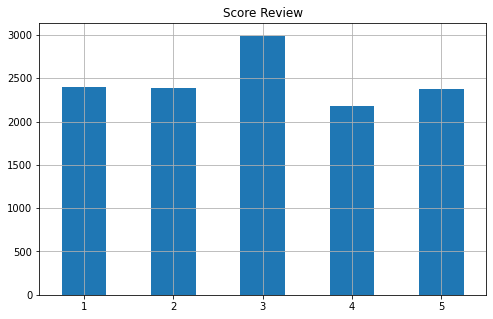

In [82]:
print(data_model['score'].value_counts().sort_index())
data_model['score'].value_counts().sort_index().plot(kind='bar', title='Score Review', grid=True, figsize=(8, 5), rot=0)

In [83]:
# from googletrans import Translator

# translator = Translator()
# data_model['content_translate'] = data_model['new_content'].apply(lambda kalimat: translator.translate(kalimat, src='id', dest='en').text)

In [84]:
# from googletrans import Translator

# translator = Translator()
# data_model['content_translate'] = data_model['new_content'].apply(lambda kalimat: translator.translate(kalimat, src='id', dest='en').text)

# data_model['positif'] = [SIA().polarity_scores(i)['pos'] for i in data_model['content_translate']]
# data_model['negatif'] = [SIA().polarity_scores(i)['neg'] for i in data_model['content_translate']]
# data_model['netral'] = [SIA().polarity_scores(i)['neu'] for i in data_model['content_translate']]
# data_model['compound'] = [SIA().polarity_scores(i)['compound'] for i in data_model['content_translate']]
# data_model['sentiment_score'] = data_model['content_translate'].apply(lambda kalimat: TextBlob(kalimat).sentiment.polarity)
# data_model['subjectivity_score'] = data_model['content_translate'].apply(lambda kalimat: TextBlob(kalimat).sentiment.subjectivity)

# data_model[['new_content','positif','negatif','netral','sentiment_score','subjectivity_score']]

In [85]:
# data_model[['new_content','positif','negatif','netral','sentiment_score','subjectivity_score']]

In [86]:
# data_model.to_csv('data_model.csv', index=False)

In [87]:
# data_model.loc[(data_model['Positif'] > data_model['Negatif']) & (data_model['Positif'] > data_model['Netral']) & (data_model['score'] == 3), 'new_content'].shape[0]

In [88]:
# data_model.loc[(data_model['Positif'] > data_model['Negatif']) & (data_model['score'] == 3), 'new_content']

### Tokenizing

In [89]:
# data_model['model_content'] = data_model['new_content'].apply(lambda x: word_tokenize(x))
# data_model[['content','model_content']].head()

### Mengolah Data

In [90]:
from langdetect import detect

def detect_language(text):
    try:
        return detect(text)
    except Exception as e:
        return str(e)

data_dump = data_model.copy()
data_dump['bahasa'] = data_dump['new_content'].apply(detect_language)

In [91]:
data_dump['bahasa'].value_counts()

id                      11172
tl                      601  
so                      69   
fi                      57   
en                      44   
da                      37   
lt                      31   
et                      31   
hr                      30   
no                      30   
cy                      29   
ro                      25   
sw                      20   
it                      14   
af                      14   
ca                      13   
sl                      13   
sk                      12   
tr                      11   
nl                      11   
pl                      9    
sq                      9    
hu                      9    
fr                      8    
pt                      6    
lv                      6    
es                      6    
No features in text.    4    
vi                      4    
sv                      4    
cs                      3    
de                      2    
Name: bahasa, dtype: int64

In [92]:
data_dump[data_dump['bahasa'] == 'No features in text.']  

,reviewId,userImage,content,score,thumbsUpCount,reviewCreatedVersion,replyContent,repliedAt,appVersion,sortOrder,appId,new_content,bahasa
1356,983ca843-6d44-4adf-9831-45c1a7b419df,https://play-lh.googleusercontent.com/a-/AD_cMMTesQ0v2a-2i6HmzvMu87Ba0UOrbLy8c5VxMQsy0DAv8kg,3🤤,3,1,4.66.1,NaN,NaN,4.66.1,newest,com.gojek.app,3,No features in text.
5581,2b33e187-fbd4-44cb-8c5e-48902eb5bb40,https://play-lh.googleusercontent.com/a-/AD_cMMQuqLw7d91K-JQ-ceejLzfgxLh3sFTvW1MPcg2thxR_6x6j,⁹⁹900⁰,2,0,5.256.0,Halo Kak. Maaf ya buat engga nyaman 🙇‍♀️\nApabila Kakak menemukan kendala pada penggunaan aplikasi Grab Penumpang maka silakan laporkan melalui link https://grb.to/consumeridhelpcenter agar bisa ditindaklanjuti ya. Terima kasih 🙏\n,2023-06-20 07:09:22,5.256.0,newest,com.grabtaxi.passenger,900,No features in text.
9482,a301d32f-83ac-4368-8175-119b866eca70,https://play-lh.googleusercontent.com/a/AAcHTtfZCHtBkNhEXNRB0qTCIWcYHbktAubshPwCWjTF307s=mo,",^;чээ тсяшұ ря3;;5 *?, = ÷: және ':б",2,0,3.15.3,NaN,NaN,3.15.3,newest,com.taxsee.taxsee,3 5,No features in text.
9502,c2c1f9ff-f71c-4ce0-a58d-2a4d779e5875,https://play-lh.googleusercontent.com/a/AAcHTtds-psDpV04TPa9My7EY-6HaorgDxVMY8iGmViHnf54=mo,6 ....,2,0,3.15.2,NaN,NaN,3.15.2,newest,com.taxsee.taxsee,6,No features in text.


In [93]:
data_dump[(~data_dump['bahasa'].isin(['No features in text.']))]

,reviewId,userImage,content,score,thumbsUpCount,reviewCreatedVersion,replyContent,repliedAt,appVersion,sortOrder,appId,new_content,bahasa
0,66707556-2762-471d-9047-928a5c9d7324,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Saya memberikan saran untuk gambar pada go food loadnya terlalu lama, user lama dalam proses memilih pesanan, karena bingung menentukan pilihan disebabkan lama dalam melihat bar, harusnya resolusi gambar di kecilkan lagi, atau size gambar <1 mb agar reloadnya cepat",3,0,NaN,NaN,NaN,NaN,most_relevant,com.gojek.app,saya memberikan saran untuk gambar pada go food loadnya terlalu lama user lama dalam proses memilih pesanan karena bingung menentukan pilihan disebabkan lama dalam melihat bar harusnya resolusi gambar di kecilkan lagi atau size gambar 1 mbak agar reloadnya cepat,id
1,6ef0548e-58b1-4a04-ae06-8db9cffa8b8e,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Bagus sih, tapi jujur aja , yg spin tokennya agak kelihatan CURANG dan LICIK , misalnya: ada 2-3 kesempatan biasanya keluar dua digit(40 - 70+) tapi kalau misalnya kesempatan spinnya disimpan2 seperti 30 ataw 40an spin, angka yg di dapat Rata rata satu digit (1,2,3,4-9) atw kadamg kadang 2 digitnya jg cman 10-30,. Amgka2 besarnya cman numpang lewat doang tapi gak perna di dapat",3,0,3.14.0,NaN,NaN,3.14.0,most_relevant,com.gojek.app,bagus sih tapi jujur saja yang spin tokennya agak kelihatan curang dan licik misalnya ada 2 3 kesempatan biasanya keluar dua digit 40 70 tapi kalau misalnya kesempatan spinnya disimpan2 seperti 30 ataw 40an spin angka yang di dapat rata rata satu digit 1 2 3 4 9 atw kadamg kadang 2 digitnya juga cman 10 30 amgka2 besarnya cman numpang lewat saja tapi tidak perna di dapat,id
2,0459b9ce-db16-4767-8762-b8462abf6e4b,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Tolong di perbaiki masalah pembayaran menggunakan go pay. Jangan pesan an dan kenyataan berbeda. Dari pesan an murah jadi setelah di antar jadi mahal dan go pay bisa ilang sendiri. Sebelum kita acc kan aneh. Uang pelanggan kok di curi.,4,1,3.15.2,NaN,NaN,3.15.2,most_relevant,com.gojek.app,tolong di perbaiki masalah pembayaran menggunakan go pay jangan pesan an dan kenyataan berbeda dari pesan an murah jadi setelah di antar jadi mahal dan go pay bisa hilang sendiri sebelum kita accord kan aneh uang pelanggan kok di curi,id
3,df42a57d-ba41-4c07-b7e9-1e2169079742,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Ada alamat2 yg sebenarnya ada di map (peta) tapi saat diketik ga bisa muncul, klik langsung di map juga ga bisa seperti jl sampit III , kramat pela.. kluarnya sampit residence terus... seperti jl lontar barat, tanjung duren.. kluarnya jl lontar raya terus.. agak repot jadinya... padahal dulu jl sampit III, kramat pela ada pilihannya trus bisa diklik juga termasuk bisa diklik di map... sekarang ga bisa... jadi lebih repot... kalau mau pesan jadi harus pilih sampit residence dulu lalu harus kasih keterangan tambahan ke drivernya.. trus kalau dicancel drivernya... harus begitu lagi...",3,0,3.15.2,NaN,NaN,3.15.2,most_relevant,com.gojek.app,ada alamat2 yang sebenarnya ada di map peta tapi saat diketik tidak bisa muncul klik langsung di map juga tidak bisa seperti jl sampit iii kramat pela kluarnya sampit residence terus seperti jl lontar barat tanjung duren kluarnya jl lontar raya terus agak repot jadinya padahal dulu jl sampit iii kramat pela ada pilihannya terus bisa diklik juga termasuk bisa diklik di map sekarang tidak bisa jadi lebih repot kalau mau pesan jadi harus pilih sampit residence dulu lalu harus kasih keterangan tambahan ke drivernya terus kalau dicancel drivernya harus begitu lagi,id
4,096ba95b-23c0-4fb3-ae8a-cf4ce849a634,https://play-lh.googleusercontent.com/EGemoI2

**Menghapus Data dengan Kategori 'bahasa' yang tidak terdefinisi**

In [94]:
print(f"Total data sebelumnya : {data_model.shape[0]}")

index = data_dump[(data_dump['bahasa'].isin(['No features in text.']))].index
data_model.drop(index, inplace=True)

print(f"Total data menjadi : {data_model.shape[0]}")

Total data sebelumnya : 12334
Total data menjadi : 12330


#### Melihat Kosa Kata Dasar

In [95]:
daftar_kata = data_dump[(~data_dump['bahasa'].isin(['No features in text.'])) & data_dump['new_content'].apply(lambda text: len(text.split()) == 1)]['new_content'].unique()
daftar_kata

array(['bagus', 'baik', 'cukup', 'terbantu', 'keren', 'mantap', 'mahal',
       'terpercaya', 'lama', 'standar', 'jl', 'yaya', 'memuaskan', 'siip',
       'mudah', 'ok', 'lumayan', 'kurang', 'gada', 'membantuuuu', 'gituu',
       'nyesel', 'payah', 'membantu', 'promo', 'gaesss', 'terbaik',
       'gogogo', 'mntap', 'udxxyxxx7x77', 'maantaap', 'kerreenn',
       'luayan', 'gajelas', 'bsgusss', 'sampah', 'susah', 'bapuk',
       'lemoooot', 'nuhu', 'iyo', 'bermanfaat', 'lemooottttttttt',
       'pertahankan', 'lemooottt', 'belum', 'ntapu', 'wow', 'manfap',
       'bad', 'jy7', 'mantulll', 'propesional', 'mantaf', 'tolkon',
       'badabes', 'jos', 'ngeleg', 'mantullah', 'rawwrrr', 'buruk', 'oke',
       'lemoootttt', 'gud', 'lemot', 'jossss', 'kookuimooniokk', 'joosss',
       'gercep', 'baguslah', 'manthap', 'best', 'miris', 'cgh',
       'menyenangkn', 'tertawa', 'cepat', 'pleerrr', 'puasss', 'gacor',
       'xgh', 'sempurna', 'great', 'nyoba', 'ramah', 'okengks', 'josss',
       'suka

In [96]:
total_data = data_dump[~data_dump['bahasa'].isin(['No features in text.'])]['new_content'].shape[0]
print(f'Total data {total_data}')
print(f'0.5% dari total data {int(total_data*0.005)}')

Total data 12330
0.5% dari total data 61


In [97]:
dummy = pd.DataFrame(columns=['kata', 'jumlah'])

for kata in daftar_kata:
    jumlah = data_dump[~data_dump['bahasa'].isin(['No features in text.'])]['new_content'].apply(lambda text: text.count(kata)).sum()
    dummy = dummy.append({'kata': kata, 'jumlah': jumlah}, ignore_index=True)

print(f"Jumlah 5% dari total data \t\t\t: {dummy[(dummy['jumlah'] >= int(total_data*0.005))].sort_values(by='jumlah', ascending=False).reset_index(drop=True).shape[0]}")
print(f"Total data dengan jumlah >= 5 \t\t\t: {dummy[(dummy['jumlah'] >= 5)].sort_values(by='jumlah', ascending=False).reset_index(drop=True).shape[0]}")
print(f"Total data dengan jumlah >= 5 dan panjang > 3 \t: {dummy[(dummy['jumlah'] >= 5) & (dummy['kata'].apply(lambda text: len(text) > 3))].sort_values(by='jumlah', ascending=False).reset_index(drop=True).shape[0]}")
print(f"Total data dengan jumlah <= 2 \t\t\t: {dummy[(dummy['jumlah'] <= 2)].sort_values(by='jumlah', ascending=False).shape[0]}")
print(f"Total data dengan jumlah < 5 \t\t\t: {dummy[(dummy['jumlah'] < 5) & (dummy['kata'].apply(lambda text: len(text) > 3))].sort_values(by='jumlah', ascending=False).shape[0]}")

Jumlah 5% dari total data 			: 64
Total data dengan jumlah >= 5 			: 128
Total data dengan jumlah >= 5 dan panjang > 3 	: 93
Total data dengan jumlah <= 2 			: 103
Total data dengan jumlah < 5 			: 98


**Melihat Kosa Kata Dasar pada Jumlah >= 5 dan Panjang Kata > 3**

In [98]:
dump = dummy[(dummy['jumlah'] >= 5) & (dummy['kata'].apply(lambda text: len(text) > 3))].sort_values(by='jumlah', ascending=False).reset_index(drop=True)
kata_1 = dump['kata'].unique()
kata_1

array(['baik', 'lama', 'grab', 'bagus', 'sangat', 'promo', 'belum',
       'susah', 'kurang', 'sesuai', 'membantu', 'suka', 'murah', 'mudah',
       'cepat', 'mahal', 'ramah', 'coba', 'mant', 'error', 'manta',
       'yaman', 'nyaman', 'mantap', 'ribet', 'enak', 'lambat', 'cukup',
       'lumayan', 'goog', 'buruk', 'jelek', 'sopan', 'puas',
       'mengecewakan', 'memuaskan', 'berat', 'sukses', 'terimakasih',
       'supir', 'payah', 'gajelas', 'keren', 'terbaik', 'lemot', 'nyoba',
       'alhamdulillah', 'sampah', 'gada', 'bermanfaat', 'penipu',
       'senang', 'terbantu', 'pertahankan', 'mengganggu', 'thank',
       'menyenangkan', 'menarik', 'sesuaikan', 'semangat', 'sempurna',
       'good', 'tertawa', 'best', 'ngebug', 'standar', 'scam', 'nyesel',
       'penipuan', 'amanah', 'hadehhh', 'terpercaya', 'panas', 'dahlah',
       'like', 'okkk', 'gacor', 'yaya', 'lamaaaaa', 'mantab', 'ngeleg',
       'gercep', 'apik', 'keep', 'great', 'mantul', 'cakep', 'okay',
       'bagusan', 'nta

**Melihat Kosa Kata Dasar pada Jumlah < 5 dan Panjang Kata > 3**

In [99]:
dump = dummy[(dummy['jumlah'] < 5) & (dummy['kata'].apply(lambda text: len(text) > 3))].sort_values(by='jumlah', ascending=False)
kata_2 = dump['kata'].unique()
kata_2

array(['terimaksih', 'bahagia', 'miris', 'konyol', 'kren', 'lemooottt',
       'lumayanla', 'mantaap', 'membntu', 'mantapss', 'josss',
       'lumayanlah', 'baguslah', 'baiiik', 'lemoootttt', 'mantan',
       'burik', 'mantulll', 'mntab', 'ntapu', 'sadis', 'mntap',
       'mantabbb', 'mantapppp', 'mntaaap', 'besttt', 'manyap',
       'masyaallaah', 'terkendali', 'menyenagkan', 'kontok', 'siiiip',
       'dasassssssd14', 'membantuuuu', 'manteeep', 'judessss', 'adeluki',
       'odongg', 'goood', 'asyiiik', 'sippp', 'i8ew', 'wusimu', 'peaktis',
       'terburuku', 'emosiiii', 'hoaks', 'okkkokkk', 'matursuwon',
       'praktir', 'mokl', 'rcc3', 'netral', 'kocakkkk', 'okeh',
       'meyenangkan', 'lemooottttttttt', 'kookuimooniokk', 'jossss',
       'rawwrrr', 'mantullah', 'badabes', 'tolkon', 'propesional',
       'manfap', 'nuhu', 'manthap', 'lemoooot', 'bsgusss', 'luayan',
       'kerreenn', 'maantaap', 'udxxyxxx7x77', 'gogogo', 'gaesss',
       'joosss', 'menyenangkn', 'okeee', 'gudnit

#### Mengganti **kata_2** Berdasarkan Variable **kata_1**

In [100]:
import difflib

threshold = 0.7
pengecualian = ['mantul', 'mengesankan']

def cari_kata_rekomendasi(daftar_kata, kata_perbaikan, threshold, pengecualian, data_dump):
    kata_rekomendasi = []

    for kata in daftar_kata:
        kata_terdekat = difflib.get_close_matches(kata, kata_perbaikan, n=1, cutoff=threshold)

        if kata in pengecualian:
            continue
        elif kata_terdekat:
            kata_rekomendasi.append((kata, kata_terdekat[0]))
            data_model['new_content'] = data_model['new_content'].apply(lambda text: text.replace(kata, kata_terdekat[0]))

    return kata_rekomendasi

rekomendasi = cari_kata_rekomendasi(kata_2, kata_1, threshold, pengecualian, dummy)
rekomendasi

[('terimaksih', 'terimakasih'),
 ('kren', 'keren'),
 ('lemooottt', 'lemot'),
 ('lumayanla', 'lumayan'),
 ('mantaap', 'mantap'),
 ('membntu', 'membantu'),
 ('mantapss', 'mantap'),
 ('lumayanlah', 'lumayan'),
 ('baguslah', 'bagusan'),
 ('baiiik', 'baik'),
 ('mantan', 'manta'),
 ('burik', 'buruk'),
 ('mantulll', 'mantul'),
 ('mntab', 'mantab'),
 ('ntapu', 'ntapp'),
 ('mntap', 'mantap'),
 ('mantabbb', 'mantab'),
 ('mantapppp', 'mantap'),
 ('mntaaap', 'mantap'),
 ('besttt', 'best'),
 ('manyap', 'mantap'),
 ('menyenagkan', 'menyenangkan'),
 ('siiiip', 'siip'),
 ('membantuuuu', 'membantu'),
 ('manteeep', 'mantap'),
 ('goood', 'good'),
 ('terburuku', 'buruk'),
 ('meyenangkan', 'menyenangkan'),
 ('mantullah', 'mantul'),
 ('manfap', 'mantap'),
 ('manthap', 'mantap'),
 ('lemoooot', 'lemot'),
 ('luayan', 'lumayan'),
 ('kerreenn', 'keren'),
 ('maantaap', 'mantap'),
 ('gogogo', 'goog'),
 ('menyenangkn', 'menyenangkan'),
 ('bagud', 'bagus'),
 ('bsempurna', 'sempurna'),
 ('baiiikk', 'baik'),
 ('matap'

In [101]:
print(f"Jumlah data yang typo : {data_model['new_content'].str.contains('kerreenn|membantuuuu|mantapss|bagud').sum()}")

Jumlah data yang typo : 0


#### Membuang Data yang Tidak Sesuai

In [102]:
data_dump = pd.DataFrame(columns=['kata', 'jumlah'])
daftar_kata = data_model[data_model['new_content'].apply(lambda text: len(text.split()) == 1)]['new_content'].unique()

for kata in daftar_kata:
    jumlah = data_model['new_content'].apply(lambda text: text.count(kata)).sum()
    data_dump = data_dump.append({'kata': kata, 'jumlah': jumlah}, ignore_index=True)

print(f"Total data dengan panjang kata <= 3 : {data_dump[(data_dump['kata'].apply(lambda text: len(text) <= 3))].sort_values(by='jumlah', ascending=False).reset_index(drop=True).shape[0]}")

Total data dengan panjang kata <= 3 : 53


In [103]:
kata = data_dump[(data_dump['kata'].apply(lambda text: len(text) <= 3))]['kata'].unique()
kata

array(['jl', 'ok', 'iyo', 'wow', 'bad', 'jy7', 'jos', 'oke', 'gud', 'cgh',
       'xgh', 't', 'kkb', 'q', 'ups', 'wel', 'y', '8v', 'nm', 'iya',
       'y8y', 's4', 'jlk', 'gc', 'pas', 'ghg', 'q1', 'jkk', 'yh', 'hah',
       'zsz', 'bug', 'tcw', 'al', 'bik', '0k', 'gas', 'joz', 'its', 'top',
       'gh3', 'deh', 'ze', 'ook', 'bh', 'yy', 'ia', 'di', 'fh', 'abc',
       'he', 'jjl', 'b'], dtype=object)

In [104]:
data = data_model[data_model['new_content'].isin(kata)][['new_content']]
index = data.index
data['new_content'].unique()

array(['jl', 'ok', 'iyo', 'wow', 'bad', 'jy7', 'jos', 'oke', 'gud', 'cgh',
       'xgh', 't', 'kkb', 'q', 'ups', 'wel', 'y', '8v', 'nm', 'iya',
       'y8y', 's4', 'jlk', 'gc', 'pas', 'ghg', 'q1', 'jkk', 'yh', 'hah',
       'zsz', 'bug', 'tcw', 'al', 'bik', '0k', 'gas', 'joz', 'its', 'top',
       'gh3', 'deh', 'ze', 'ook', 'bh', 'yy', 'ia', 'di', 'fh', 'abc',
       'he', 'jjl', 'b'], dtype=object)

In [105]:
print(f"Total data sebelumnya : {data_model.shape[0]}")

data_model.drop(index, inplace=True)

print(f"Total data menjadi : {data_model.shape[0]}")

Total data sebelumnya : 12330
Total data menjadi : 12266


In [106]:
data_dump = pd.DataFrame(columns=['kata', 'jumlah'])
daftar_kata = data_model[data_model['new_content'].apply(lambda text: len(text.split()) == 1)]['new_content'].unique()

for kata in daftar_kata:
    jumlah = data_model['new_content'].apply(lambda text: text.count(kata)).sum()
    data_dump = data_dump.append({'kata': kata, 'jumlah': jumlah}, ignore_index=True)

print(f"Total data dengan panjang kata < 5 : {data_dump[(data_dump['jumlah'] < 5)].sort_values(by='jumlah', ascending=False).reset_index(drop=True).shape[0]}")

Total data dengan panjang kata < 5 : 54


In [107]:
kata_3 = data_dump[(data_dump['jumlah'] < 5)]['kata'].unique()
kata_3

array(['gituu', 'gaesss', 'udxxyxxx7x77', 'bsgusss', 'nuhu',
       'lemottttttt', 'propesional', 'tolkon', 'badabes', 'rawwrrr',
       'jossss', 'kookuimooniokk', 'joosss', 'miris', 'pleerrr',
       'okengks', 'josss', 'seruu', 'j800', 'westalah', 'perfectt',
       'gudnite', 'kouu777', 'rojan', 'okeh', '309998u', 'masok', 'okeee',
       'mokl', 'kocakkkk', 'konyol', 'kontok', 'terkendali',
       'masyaallaah', 'sadis', 'bahagia', 'lumayanh', 'dasassssssd14',
       'judessss', 'netral', 'rcc3', 'praktir', 'matursuwon', 'okkkokkk',
       'hoaks', 'emosiiii', 'peaktis', 'wusimu', 'i8ew', 'sippp',
       'asyiiik', 'odongg', 'adeluki', 'niceeee'], dtype=object)

In [108]:
threshold = 0.7
pengecualian = ['mengesankan', 'mantul']

def cari_kata_rekomendasi(daftar_kata, kata_perbaikan, threshold, pengecualian, data_dump):
    kata_rekomendasi = []

    for kata in daftar_kata:
        kata_terdekat = difflib.get_close_matches(kata, kata_perbaikan, n=1, cutoff=threshold)

        if kata in pengecualian:
            continue
        elif kata_terdekat:
            kata_rekomendasi.append((kata, kata_terdekat[0]))
            data_model['new_content'] = data_model['new_content'].apply(lambda text: text.replace(kata, kata_terdekat[0]))

    return kata_rekomendasi

rekomendasi = cari_kata_rekomendasi(kata_3, kata_1, threshold, pengecualian, dummy)
rekomendasi

[('lumayanh', 'lumayan')]

In [109]:
data_dump = pd.DataFrame(columns=['kata', 'jumlah'])
daftar_kata = data_model[data_model['new_content'].apply(lambda text: len(text.split()) == 1)]['new_content'].unique()

for kata in daftar_kata:
    jumlah = data_model['new_content'].apply(lambda text: text.count(kata)).sum()
    data_dump = data_dump.append({'kata': kata, 'jumlah': jumlah}, ignore_index=True)

print(f"Total data dengan panjang kata < 5 : {data_dump[(data_dump['jumlah'] < 5)].sort_values(by='jumlah', ascending=False).reset_index(drop=True).shape[0]}")

Total data dengan panjang kata < 5 : 53


In [110]:
data = data_dump[(data_dump['jumlah'] < 5)].sort_values(by='jumlah', ascending=False).reset_index(drop=True)
data[data['jumlah'] > 1]

,kata,jumlah
0,miris,4
1,konyol,4
2,bahagia,4
3,josss,3
4,sadis,2


In [111]:
kata = ['bismillah', 'bahagia', 'mantul', 'great', 'mengesankan', 'konyol']
data_model[data_model['new_content'].isin(kata)]

,reviewId,userImage,content,score,thumbsUpCount,reviewCreatedVersion,replyContent,repliedAt,appVersion,sortOrder,appId,new_content
3585,4797736c-049c-4411-9603-0ec4cfa3968d,https://play-lh.googleusercontent.com/a-/AD_cMMTZ1RgDC0J0LaB5E_2Ka4Let_3qBRjxyRjZKf-zPn-Ulg,mantulll,5,0,4.72.1,NaN,NaN,4.72.1,newest,com.gojek.app,mantul
3686,b60dc53b-9973-4ab4-8dc0-48803e9640cf,https://play-lh.googleusercontent.com/a-/AD_cMMRo2KTqCKECSrvXpU6RnN3VJWGwhGtdHHfIiVt0Ye-UIg,Mantullah,5,0,4.72.1,NaN,NaN,4.72.1,newest,com.gojek.app,mantul
4170,bc5c30df-5b8c-4f15-a6ce-ce746e93ba09,https://play-lh.googleusercontent.com/a-/AD_cMMQH7htjWfxvLGP5cyjL45m4dKopoyGrkpcRK32h0Of5Nio,Great,5,0,4.72.1,NaN,NaN,4.72.1,newest,com.gojek.app,great
7057,a089dcfe-f152-42d7-b724-34c4b94b38d6,https://play-lh.googleusercontent.com/a/AAcHTte3KZYgzknvFisWVbEpGNDje-4jTaoFB7owZnvJe-LL=mo,great,4,0,5.265.0,NaN,NaN,5.265.0,newest,com.grabtaxi.passenger,great
7697,8c520c86-ae4b-4dfb-8a0c-20a7cecd9418,https://play-lh.googleusercontent.com/a-/AD_cMMSb-P5p94l_czcAh2nsGhaSaU-5hiebZRWhr5IcFx2PIQ,konyol,1,0,NaN,"Halo Kak, maaf ya jadi bikin nggak nyaman 🙇‍♀️\nApabila Kakak menemukan kendala pada penggunaan aplikasi Grab Penumpang, maka silakan laporkan melalui link https://grb.to/consumeridhelpcenter agar bisa ditindaklanjuti ya. Terima kasih 🙏\n",2023-08-19 05:00:43,NaN,newest,com.grabtaxi.passenger,konyol
7867,387005f7-27fd-48a2-8e02-6ccc72b2da06,https://play-lh.googleusercontent.com/a/AAcHTtf0BknbThFks0z5Y6Z9ChApt_594JKkf4bUI3JH4_yt=mo,Happy,5,0,5.266.0,NaN,NaN,5.266.0,newest,com.grabtaxi.passenger,bahagia
8241,2c87c18b-686e-44c4-ac55-d70d62eac0c7,https://play-lh.googleusercontent.com/a-/AD_cMMTwtp8-FGIkvlmFj6Ypmx6qHXa7aX1_9BaHAWNpnVRdg0M,great,5,1,5.266.0,NaN,NaN,5.266.0,newest,com.grabtaxi.passenger,great
11854,9e98551e-bc86-4602-a969-ed1214d60098,https://play-lh.googleusercontent.com/a/AAcHTtf7f4oL0qukX9saJT69V0WZIeCWV_J4vDWkSiM2DHz5=mo,mantul👍👍👍👍👍,5,0,3.15.4,NaN,NaN,3.15.4,newest,com.taxsee.taxsee,mantul
11951,edb66d32-56a5-433c-9b68-585ff7434bb2,https://play-lh.googleusercontent.com/a-/AD_cMMRcJ0jOE8b2nZvqajlcUI-Q-M_R_b4bWzvUh1fXTZ01-g,Mantul.....,5,0,3.15.6,NaN,NaN,3.15.6,newest,com.taxsee.taxsee,mantul


In [112]:
daftar_kata = data[~data['kata'].isin(kata)]['kata'].unique()
daftar_kata

array(['miris', 'josss', 'sadis', 'praktir', 'kontok', 'terkendali',
       'masyaallaah', 'dasassssssd14', 'judessss', 'netral', 'rcc3',
       'gituu', 'mokl', 'matursuwon', 'okkkokkk', 'hoaks', 'emosiiii',
       'peaktis', 'wusimu', 'i8ew', 'sippp', 'asyiiik', 'odongg',
       'adeluki', 'kocakkkk', 'masok', 'okeee', 'joosss', 'udxxyxxx7x77',
       'bsgusss', 'nuhu', 'lemottttttt', 'propesional', 'tolkon',
       'badabes', 'rawwrrr', 'jossss', 'kookuimooniokk', 'pleerrr',
       'gaesss', 'okengks', 'seruu', 'j800', 'westalah', 'perfectt',
       'gudnite', 'kouu777', 'rojan', 'okeh', '309998u', 'niceeee'],
      dtype=object)

In [113]:
index = data_model[data_model['new_content'].isin(daftar_kata)]['new_content'].index
print(f"Total data sebelumnya : {data_model.shape[0]}")
data_model.drop(index, inplace=True)
print(f"Total data menjadi : {data_model.shape[0]}")

Total data sebelumnya : 12266
Total data menjadi : 12214


#### Melihat Kata Berdasarkan Pengelompokkan Kolom **new_content**

In [114]:
data_dump = pd.DataFrame(columns=['kata', 'jumlah'])
daftar_kata = data_model[data_model['new_content'].apply(lambda text: len(text.split()) == 1)]['new_content'].unique()

for kata in daftar_kata:
    jumlah = data_model['new_content'].apply(lambda text: text.count(kata)).sum()
    data_dump = data_dump.append({'kata': kata, 'jumlah': jumlah}, ignore_index=True)

print(f"Total data dengan panjang kata >= 5 : {data_dump[(data_dump['jumlah'] >= 5)].sort_values(by='jumlah', ascending=False).reset_index(drop=True).shape[0]}")

Total data dengan panjang kata >= 5 : 95


In [115]:
kata_4 = data_dump[(data_dump['jumlah'] >= 5)]['kata'].unique()
kata_4

array(['bagus', 'baik', 'cukup', 'terbantu', 'keren', 'mantap', 'mahal',
       'terpercaya', 'lama', 'standar', 'yaya', 'memuaskan', 'siip',
       'mudah', 'lumayan', 'kurang', 'gada', 'membantu', 'nyesel',
       'payah', 'promo', 'terbaik', 'goog', 'gajelas', 'sampah', 'susah',
       'bapuk', 'lemot', 'bermanfaat', 'pertahankan', 'belum', 'ntapp',
       'mantul', 'mantaf', 'ngeleg', 'buruk', 'lemott', 'gercep',
       'bagusan', 'best', 'menyenangkan', 'tertawa', 'cepat', 'puas',
       'gacor', 'sempurna', 'great', 'nyoba', 'ramah', 'suka', 'coba',
       'jelek', 'ribet', 'semangat', 'sangat', 'lamaaaaa', 'hadehhh',
       'sesuaikan', 'alhamdulillah', 'menarik', 'yaman', 'baikk', 'sopan',
       'keep', 'okkk', 'okay', 'amanah', 'grab', 'mengganggu',
       'mengecewakan', 'good', 'cakep', 'berat', 'nyaman', 'lambat',
       'penipu', 'apik', 'scam', 'enak', 'mant', 'manta', 'thank',
       'dahlah', 'supir', 'panas', 'like', 'senang', 'sukses',
       'terimakasih', 'sesuai',

In [116]:
kata = ['gada', 'yaya', 'penguna', 'belum', 'ajib', 'coba', 'nyoba', 'sangat', 'keep', 'babi', 'promo', 'goog', 'dahla', 'gacor', 'supir', 'berat', 'sesuaikan', 'tertawa', 'hadeh', 'grab', 'dahlah', 'panas']
index = data_model[data_model['new_content'].isin(kata)]['new_content'].index
print(f"Total data sebelumnya : {data_model.shape[0]}")
data_model.drop(index, inplace=True)
print(f"Total data menjadi : {data_model.shape[0]}")

Total data sebelumnya : 12214
Total data menjadi : 12194


In [117]:
kata_perbaikan = {  'lamaaaaa': 'lama',
                    'lambat': 'lama',
                    'hadehhh': 'hadeh',
                    'yaman': 'nyaman',
                    'baikk': 'baik',
                    'siip': 'sip',
                    'okkk': 'okay',
                    'manta': 'mantap',
                    'mant': 'mantap',
                    'mantab': 'mantap',
                    'mantul': 'mantap',
                    'okkkkk': 'okay',
                    'mantaf': 'mantap',
                    'terimakasih': 'terima kasih',
                    'asyik': 'asik',
                    'bapuk': 'jelek',
                    'apik': 'bagus',
                    'gercep': 'cepat',
                    'thank': 'terima kasih',
                    'like': 'suka',
                    'lemott': 'lama',
                    'ntapp': 'mantap',
                    'ngeleg': 'lama',
                    'bagusan': 'bagus',
                    'scam': 'penipuan',
                    'penipu': 'penipuan',
                    'ngebug': 'error'
                }

data_model['new_content'] = data_model['new_content'].apply(lambda kalimat: ' '.join([kata_perbaikan.get(kata, kata) for kata in kalimat.split()]))

In [118]:
data_dump = pd.DataFrame(columns=['kata', 'jumlah'])
daftar_kata = data_model[data_model['new_content'].apply(lambda text: len(text.split()) == 1)]['new_content'].unique()

for kata in daftar_kata:
    jumlah = data_model['new_content'].apply(lambda text: text.count(kata)).sum()
    data_dump = data_dump.append({'kata': kata, 'jumlah': jumlah}, ignore_index=True)

data_dump[(data_dump['jumlah'] >= 5)]['kata'].unique()

array(['bagus', 'baik', 'cukup', 'terbantu', 'keren', 'mantap', 'mahal',
       'terpercaya', 'lama', 'standar', 'memuaskan', 'sip', 'mudah',
       'lumayan', 'kurang', 'membantu', 'nyesel', 'payah', 'terbaik',
       'gajelas', 'sampah', 'susah', 'jelek', 'lemot', 'bermanfaat',
       'pertahankan', 'buruk', 'cepat', 'best', 'menyenangkan', 'puas',
       'sempurna', 'great', 'ramah', 'suka', 'ribet', 'semangat', 'hadeh',
       'alhamdulillah', 'menarik', 'nyaman', 'sopan', 'okay', 'amanah',
       'mengganggu', 'mengecewakan', 'good', 'cakep', 'penipuan', 'enak',
       'senang', 'sukses', 'sesuai', 'error', 'murah'], dtype=object)

In [120]:
kata = ['hadeh']
index = data_model[data_model['new_content'].isin(kata)]['new_content'].index
print(f"Total data sebelumnya : {data_model.shape[0]}")
data_model.drop(index, inplace=True)
print(f"Total data menjadi : {data_model.shape[0]}")

Total data sebelumnya : 12194
Total data menjadi : 12193


#### Perbaiki Penulisan Kata

In [ ]:
print(kata_1, '\n')
print(kata_3)

['s' 't' 'ya' 'al' 'di' 'ia' 'baik' 'up' 'lama' 'grab' 'bagus' 'sangat'
 'iya' 'banget' 'pas' 'promo' 'aman' 'membantu' 'kurang' 'sesuai' 'he'
 'nce' 'suka' 'mudah' 'murah' 'cepat' 'ramah' 'mahal' 'lambat' 'coba'
 'error' 'antap' 'mantap' 'deh' 'yaman' 'nyaman' 'biasa' 'ribet' 'yah'
 'cukup' 'lumayan' 'bug' 'buruk' 'jelek' 'sopan' 'puas' 'q' 'memuaskan'
 'uninstall' 'berat' 'sukses' 'bh' 'mengecewakan' 'bad' 'keren' 'payah'
 'terbaik' 'abc' 'gajelas' 'pasang' 'bermanfaat' 'jl' 'nyoba' 'senang'
 'alhamdulillah' 'terbantu' 'gada' 'sampah' 'ze' 'simpel' 'cocok'
 'semangat' 'ooo' 'best' 'mengganggu' 'menarik' 'menyenangkan' 'knapa'
 'sempurna' 'profesional' 'trimakasih' 'jn' 'ngebug' 'sesuaikan' 'ajib'
 'baguss' 'terhadap' 'nyesel' 'gojeg' 'ook' 'yy' 'good' 'nm' 'standar'
 'jos' 'terpercaya' 'penipuan' 'okkk' 'yh' 'hah' 'amanah' 'terimakasih'
 'bersahabat' 'gc' 'panas' 'wel' 'bagusss' 'hadehhh' 'jelekk' 'yaya'
 'maksih' 'keep' 'lamaaaaa' 'siip' 'cakep' 'like' 'begitulah' 'babi' 'ups'
 'gud

In [ ]:
kata = ['sangat bagus', 'bagus job', 'lumayan bagus', 'lumayan', 'bagus', 'mantap', 'sangat baik', 'baik', 'keren', 'coba', 'mahal', 'grab', 'lama', 'nyaman', 'cepat', 'suka', 'best' 'jelek', 'ribet', 'promo', 'okk', 'sangat puas', 'puas', 'sangat ramah', 'ramah', 'very bagus']

In [44]:
def perbaikan_kalimat(kalimat, daftar_kata):
    kalimat_benar = []
    words = kalimat.split()

    for word in words:
        found = False
        for correct_word in daftar_kata:
            if correct_word in word:
                kalimat_benar.append(correct_word)
                found = True
                break
        if not found:
            kalimat_benar.append(word)

    return ' '.join(kalimat_benar)

data_dump['fix_typo'] = data_dump['new_content'].apply(lambda text: perbaikan_kalimat(text, kata))
data_dump[['new_content', 'fix_typo']].iloc[0:10]

,new_content,fix_typo
0,untuk yang versi yang baru saya kurang suka karena tulisan nama jalan dan tempat pada maps nya pada hilang kecuali pada nama jalan utama dan itu menyulitkan jikalau mau mencari lokasi yang lebih spesifik apabila tidak ada pada kolom pencarian mohon diperbaiki lagi terutama maps nya,untuk yang versi yang baru saya kurang suka karena tulisan nama jalan dan tempat pada maps nya pada hilang kecuali pada nama jalan utama dan itu menyulitkan jikalau mau mencari lokasi yang lebih spesifik apabila tidak ada pada kolom pencarian mohon baik lagi terutama maps nya
1,untuk toko yang bekerja sama menerangkan harga tidak sesuai dengan yang tertera di aplikasi itu perlu di perbaiki untuk kenyamanan bersama karena sudah terlalu sering harga tidak sesuai di aplikasi terima kasih sementara saya kasih bintang segitu dulu,untuk toko yang bekerja sama menerangkan harga tidak sesuai dengan yang tertera di aplikasi itu perlu di baik untuk nyaman bersama karena sudah terlalu sering harga tidak sesuai di aplikasi terima kasih sementara saya kasih bintang segitu dulu
2,setelah update aplikasi bahkan susah masuknya berkali kali minta kode verifikasi tapi tetap tidak bisa masuk bolak balik disitu situ saja mentok update aplikasi bukannya lebih bagus bahkan tambah jelek mau masuk ke akun saja susahnya minta ampun ribet,setelah update aplikasi bahkan susah masuknya berkali kali minta kode verifikasi tapi tetap tidak bisa masuk bolak balik disitu situ saja mentok update aplikasi bukannya lebih bagus bahkan tambah jelek mau masuk ke akun saja susahnya minta ampun ribet
3,kepada pengembang aplikasi tolong diperhatikan pada tampilan menu makanannya akan lebih baik lagi bila setiap menu makanan ada gambarnya jadi orang yang mau milih menunya bisa tahu kalau menu yang dipesannya seperti apa segera diupdate iya,kepada pengembang aplikasi tolong diperhatikan pada tampilan menu makanannya akan lebih baik lagi bila setiap menu makanan ada gambarnya jadi orang yang mau milih menunya bisa tahu kalau menu yang dipesannya seperti apa segera diupdate iya
4,mohon maaf sebelumnya tapi grab yang sekarang sangat menyulitkan penggunanya kenapa karena nama2 jalan kecil sudah banyak yang hilang dan hanya nama2 jalan utama saja yang terlihat jika mencari mengunakan fitur search banyak nama jalan yang sama jadi penggunanya merasa bingung cobalah untuk menjadikan ke versi maps sebelumnya yang lebih memudahkan untuk mencari lokasi jika ada yang kurang mohon pencerahan,mohon maaf sebelumnya tapi grab yang sekarang sangat menyulitkan penggunanya kenapa karena nama2 jalan kecil sudah banyak yang hilang dan hanya nama2 jalan utama saja yang terlihat jika mencari mengunakan fitur search banyak nama jalan yang sama jadi penggunanya merasa bingung coba untuk menjadikan ke versi maps sebelumnya yang lebih memudahkan untuk mencari lokasi jika ada yang kurang mohon pencerahan
5,min orderan jadi sepi penumpang banyak mengeluh hanya karena fitur aplikasi yang sekarang jadi sulit dimengerti apalagi buat para ibu ibu atau umur diatas 30th mengeluh karena fitur aplikasi sulit dipahami contohnya jika ketik alamat yang belum terdaftar di google secara harus klik maps di pojok kanan atas yang pelanggan belum tahu sedangkan itu berupa logo kecil akan lebih baik jika disederhanakan yang bertuliskan cari alamat di peta,min orderan jadi sepi penumpang banyak mengeluh hanya karena fitur aplikasi yang sekarang jadi sulit dimengerti apalagi buat para ibu ibu atau umur diatas 30th mengeluh karena fitur aplikasi sulit dipahami contohnya jika ketik lama yang belum terdaftar di google secara harus klik maps di pojok kanan atas yang pelanggan belum tahu sedangkan itu berupa logo kecil akan lebih baik jika disederhanakan yang bertuliskan cari lama di peta
6,sebenarnya sih sangat membantu akan tetapi saat masuk ke aplikasi nya terkadang lama dan driver nya terkadang meminta kita untuk cancel atau driver itu sendiri yang cancel mohon di perbaiki terutama saat ingin masuk ke aplikasi terima 

#### Pengecekan Kembali Data

In [330]:
def cek_kata_pada_kalimat(kalimat):
    for x in daftar_kata:
        if x in kalimat:
            return True
    return False

data_dump[(~data_dump['bahasa'].isin(['id', 'No features in text.'])) & (~data_dump['new_content'].apply(lambda text: cek_kata_pada_kalimat(text)))]

,score,content,new_content,model_content,bahasa
1824,3,Google map sampeyan eror mas.. Apa sinyal lagi trouble kok rute jalan motornya nge-bug 🤣🤣🤣,google map anda eror mas apa sinyal lagi trouble kok rute jalan motornya nge bug,"[google, map, anda, eror, mas, apa, sinyal, lagi, trouble, kok, rute, jalan, motornya, nge, bug]",tl
2681,3,kok gabisa di instal siiiiiii😭😭😭😭,kok tidak bisa di instal siiiiiii,"[kok, tidak, bisa, di, instal, siiiiiii]",et
2745,3,"kurangin dong ongkos nya , mhal",kurangin dong ongkos nya mahal,"[kurangin, dong, ongkos, nya, mahal]",tl
2804,3,mahalll,mahalll,[mahalll],so
2824,2,O.goqg😂@/(0@= e.😞,o goqg di 0 di e,"[o, goqg, di, 0, di, e]",it
...,...,...,...,...,...
12508,4,Udxxyxxx7x77,udxxyxxx7x77,[udxxyxxx7x77],so
12511,1,Bintang nol ada gak sih. Mau sy kasih nol aja. Bintang nol nol nol nol nol,bintang nol ada tidak sih mau saya kasih nol saja bintang nol nol nol nol nol,"[bintang, nol, ada, tidak, sih, mau, saya, kasih, nol, saja, bintang, nol, nol, nol, nol, nol]",tl
12522,4,"Okkk7kk9kk797889,9o9",okkk7kk9kk797889 9o9,"[okkk7kk9kk797889, 9o9]",no
12551,5,mantaaabbbb,mantaaabbbb,[mantaaabbbb],so


#### Explore Data

In [331]:
dump = data_dump[(~data_dump['bahasa'].isin(['id', 'No features in text.'])) & (~data_dump['new_content'].apply(lambda text: cek_kata_pada_kalimat(text)))].copy()
daftar_kata_2 = dump[dump['model_content'].apply(lambda text: len(text) == 1)]['new_content'].unique()
daftar_kata_2

array(['mahalll', 'jn ', 'mantaaaaapppp', 'nyoba', 'josss', 'suka',
       'eror ', 't ', 'deh', 'coba', 'cepat', ' antap', 'dasassssssd14',
       'jelek', 'matep', 'ze', 'panas', 'like', 'jos', 'manteeep',
       'ribet', 'judessss', 'ook', 'bh', 'sangat ', 'risma', 'j800',
       'lamaaaaa', 'hadehhh', 'baiiik ', 'netral', 'guzel', 'matap',
       'maksih', 'pasang', 'bad', 'mntapp', '2len', 'rcc3', 'yy', 'seppp',
       'profesional', 'gooooood', 'cocok', 'baguu', 'ooo', 'recomanded',
       'impossible', 'kkb', 'mayan', 'perfectt', 'gudnite',
       'alhamdulillah', 'q ', '4bintang', 'ajib', 'ia', 'yaman', 'ups',
       'best', 'trimskh', 'wel', 'mabtap', 'baiiikk', 'praktir', 'siip',
       'kouu777', 'sopan', 'matursuwon', 'zooooossss', 'keep', 'okeehhh',
       'mahal ', 'okkk', 'aneh', 'okay', 'rojan', 'promo', 'bobrok',
       'senang', ' di ', 'mntaap', 'f5', 'okkkokkk', 'mantabs', 'bgusss',
       'odadi', 'lama', ' jl ', 'yaya', 'amanah', 'uninstall', 'waduk',
       'kopl

In [332]:
dummy = pd.DataFrame(columns=['kata', 'jumlah'])

# Loop untuk menghitung jumlah kata dalam daftar_kata
for kata in daftar_kata_2:
    jumlah = dump[~dump['bahasa'].isin(['id', 'No features in text.'])]['new_content'].apply(lambda x: x.count(kata.replace(' ',''))).sum()
    # Menambahkan hasil perhitungan ke DataFrame dump
    dummy = dummy.append({'kata': kata, 'jumlah': jumlah}, ignore_index=True)

# Menampilkan hasil DataFrame dum
dummy[(dummy['jumlah'] >= 5)].sort_values(by='jumlah', ascending=False).reset_index(drop=True)

,kata,jumlah
0,t,476
1,v,55
2,di,45
3,iya,32
4,eror,23
5,eror,23
6,coba,18
7,sangat,18
8,mahal,16
9,grab,14


In [333]:
kata = 'eror|mahal|cepat|lama|bad|best|suka|ribet|jelek|sopan|busuk'
data = dump[~dump['new_content'].str.contains(kata, case=False, regex=True)]
index = data.index
data

,score,content,new_content,model_content,bahasa
2681,3,kok gabisa di instal siiiiiii😭😭😭😭,kok tidak bisa di instal siiiiiii,"[kok, tidak, bisa, di, instal, siiiiiii]",et
2824,2,O.goqg😂@/(0@= e.😞,o goqg di 0 di e,"[o, goqg, di, 0, di, e]",it
2846,3,kita coba dulu aplikasi nya,kita coba dulu aplikasi nya,"[kita, coba, dulu, aplikasi, nya]",sw
2862,2,Jn..,jn,[jn],nl
3041,2,"Your driver was Lee Vui Keong in a brown Perodua Bezza, licence plate number SAC6272D. Thank you for riding with us! _Bastos talaga at nung gusto niya akong sunduin nagalit siya...",your driver was lee vui keong in a brown perodua bezza licence plate number sac6272d thank you for riding with us bastos talaga at nung gusto niya akong sunduin nagalit siya,"[your, driver, was, lee, vui, keong, in, a, brown, perodua, bezza, licence, plate, number, sac6272d, thank, you, for, riding, with, us, bastos, talaga, at, nung, gusto, niya, akong, sunduin, nagalit, siya]",en
...,...,...,...,...,...
12508,4,Udxxyxxx7x77,udxxyxxx7x77,[udxxyxxx7x77],so
12511,1,Bintang nol ada gak sih. Mau sy kasih nol aja. Bintang nol nol nol nol nol,bintang nol ada tidak sih mau saya kasih nol saja bintang nol nol nol nol nol,"[bintang, nol, ada, tidak, sih, mau, saya, kasih, nol, saja, bintang, nol, nol, nol, nol, nol]",tl
12522,4,"Okkk7kk9kk797889,9o9",okkk7kk9kk797889 9o9,"[okkk7kk9kk797889, 9o9]",no
12551,5,mantaaabbbb,mantaaabbbb,[mantaaabbbb],so


In [334]:
print(data_model.shape[0])
data_model.drop(index=index, inplace=True)
data_dump.drop(index=index, inplace=True)
print(data_model.shape[0])

11463
10905


In [342]:
dump = data_dump[(~data_dump['bahasa'].isin(['id', 'No features in text.']))].groupby(['new_content']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)
dump['new_content'].unique()

array(['bagus', 'mantap', 'sangat baik', 'keren', 'lumayan',
       'sangat bagus', 'nyaman', 'sangat puas', 'bagus job', 'mantap ',
       'very bagus', 'lumayan bagus', 'cepat', 'suka', 'bagus ', 'bad',
       'the best', 'jos mantap', 'ongkirnya mahal', 'sangat nyaman',
       'bagusss', 'is the best', 'not bad', 'best', 'maxim mantap',
       'jelek', 'lumayan baik', 'aplikasi busuk', 'mantap driver sopan',
       'lumayan nyaman', 'lumayan promonya', 'maps kadang eror',
       'maps nya eror terussssss', 'masih the best', 'maxim eror wae',
       'lumayan lah', 'mantap euy', 'maxim keren', 'lumayan fasilitas',
       'lumayan cukup', 'maximku eror tidak bisa login',
       'mobil nya bagus', 'murce jemputny juga cepat', 'maps eror terus',
       'mapnya kurang bagus',
       'map sering ngaco makin lama tambah mahal iya', 'mantappppp lah',
       'mantap gojek', 'makin mahal yaaaaa', 'mantap pakai gojek',
       'makin lama ongkos kirim makin mahal untuk gofood nya astaga harga na

In [343]:
data_dump[(~data_dump['bahasa'].isin(['id', 'No features in text.']))]

,score,content,new_content,model_content,bahasa
1824,3,Google map sampeyan eror mas.. Apa sinyal lagi trouble kok rute jalan motornya nge-bug 🤣🤣🤣,google map anda eror mas apa sinyal lagi trouble kok rute jalan motornya nge bug,"[google, map, anda, eror, mas, apa, sinyal, lagi, trouble, kok, rute, jalan, motornya, nge, bug]",tl
2661,3,Keren,keren,[keren],da
2682,3,Bagus,bagus,[bagus],tl
2745,3,"kurangin dong ongkos nya , mhal",kurangin dong ongkos nya mahal,"[kurangin, dong, ongkos, nya, mahal]",tl
2746,3,nyaman,nyaman,[nyaman],sw
...,...,...,...,...,...
12563,5,Keren,keren,[keren],da
12566,4,bagus,bagus,[bagus],tl
12568,5,sangat baik,sangat baik,"[sangat, baik]",tl
12571,5,mantap,mantap,[mantap],tl


### Membuang Stopword

In [272]:
print(f"Contoh kata : {stopwords.words('indonesian')[0:10]}")

Contoh kata : ['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir']


In [150]:
data_model['model_content'] = data_model['model_content'].apply(lambda kalimat: [kata for kata in kalimat if kata not in stopwords.words("indonesian")])
data_model[['content','model_content']].head()

,content,model_content
0,Untuk yg versi yg baru saya kurang suka karena tulisan nama jalan dan tempat pada maps nya pada ilang (kecuali pada nama jalan utama). Dan itu menyulitkan jikalau mau mencari lokasi yg lebih spesifik apabila tidak ada pada kolom pencarian. Mohon diperbaiki lagi terutama maps nya 🙏,"[versi, suka, tulisan, nama, jalan, maps, nya, hilang, kecuali, nama, jalan, utama, menyulitkan, mencari, lokasi, spesifik, kolom, pencarian, mohon, diperbaiki, maps, nya]"
1,Untuk toko yang bekerja sama menerangkan harga tidak sesuai dengan yang tertera di aplikasi. Itu perlu di perbaiki untuk kenyamanan bersama. Karena sudah terlalu sering harga tidak sesuai di aplikasi. Terimakasih Sementara saya kasih bintang segitu dulu.,"[toko, menerangkan, harga, sesuai, tertera, aplikasi, perbaiki, kenyamanan, harga, sesuai, aplikasi, terima, kasih, kasih, bintang, segitu]"
2,"Kpd pengembang aplikasi, tolong diperhatikan pd tampilan menu makanannya.. Akan lebih baik lagi bila setiap menu makanan ada gambarnya, jadi org yg mau milih menunya bisa tau klo menu yg dipesannya seperti apa... Segera diupdate ya...","[pengembang, aplikasi, tolong, diperhatikan, tampilan, menu, makanannya, menu, makanan, gambarnya, orang, milih, menunya, menu, dipesannya, diupdate, iya]"
3,"Mohon maaf sebelumnya tapi grab yang sekarang sangat menyulitkan penggunanya,kenapa?karna nama2 jln kecil sudah banyak yang hilang dan hanya nama2 jalan utama saja yang terlihat.jika mencari mengunakan fitur search banyak nama jalan yg sama jadi penggunanya merasa bingung.cobalah untuk menjadikan ke versi maps sebelumnya yang lebih memudahkan untuk mencari lokasi(jika ada yang kurang mohon pencerahan)","[mohon, maaf, grab, menyulitkan, penggunanya, nama2, jalan, hilang, nama2, jalan, utama, mencari, mengunakan, fitur, search, nama, jalan, penggunanya, bingung, cobalah, menjadikan, versi, maps, memudahkan, mencari, lokasi, mohon, pencerahan]"
4,"Min, Orderan jadi sepi. Penumpang banyak mengeluh hanya karena fitur app yang sekarang jadi sulit dimengerti. apalagi buat para ibu ibu atau umur diatas 30th. Mengeluh karena fitur app sulit dipahami, Contohnya : jika ketik alamat yg belum terdaftar di google, secara harus klik maps di pojok kanan atas (yang pelanggan belum tau). Sedangkan itu berupa logo kecil. Akan lebih baik jika disederhanakan yg bertuliskan ""cari alamat di peta""","[min, orderan, sepi, penumpang, mengeluh, fitur, aplikasi, sulit, dimengerti, umur, diatas, 30th, mengeluh, fitur, aplikasi, sulit, dipahami, contohnya, ketik, alamat, terdaftar, google, klik, maps, pojok, kanan, pelanggan, logo, disederhanakan, bertuliskan, cari, alamat, peta]"


### Melihat Data Apakah Ada yang Tidak Sesuai pada Kolom **'model_content'**

In [151]:
data_model[data_model['model_content'].apply(lambda kata: len(kata) == 0)]

,score,content,new_content,model_content
1614,3,Okelah,baik,[]
1664,3,Oke,baik,[]
1742,3,ok,baik,[]
1841,3,👍,,[]
1843,3,👍👍👍,,[]
...,...,...,...,...
7171,5,ok,baik,[]
7181,5,tepat waktu,tepat waktu,[]
7192,5,ok,baik,[]
7193,1,baik,baik,[]


#### Membuang Data yang Tidak Memiliki Konten

In [152]:
data_model[data_model['new_content'] == ' ']

,score,content,new_content,model_content
1841,3,👍,,[]
1843,3,👍👍👍,,[]
2392,3,😊,,[]
3120,3,👍👍👍👍,,[]
3669,3,😎,,[]
3879,2,😔🙏,,[]
4288,2,😙😙😙😙😙😙😙😙😙😙😙😗😗,,[]
4510,3,😊,,[]
4854,4,👍,,[]
5039,4,👍👍👍👍👍👍👍👍👍👍👍,,[]


In [153]:
data_model.drop(data_model[data_model['new_content'] == ' '].index, inplace=True)
data_model[data_model['model_content'].apply(lambda kata: len(kata) == 0)].shape[0]

219

In [154]:
data_model[data_model['model_content'].apply(lambda kata: len(kata) == 0)].iloc[0:21]

,score,content,new_content,model_content
1614,3,Okelah,baik,[]
1664,3,Oke,baik,[]
1742,3,ok,baik,[]
1962,3,Ok,baik,[]
1981,3,baik,baik,[]
2016,3,ok,baik,[]
2104,3,ok,baik,[]
2123,3,ok,baik,[]
2139,3,ok,baik,[]
2219,3,baik,baik,[]


In [155]:
data_model[data_model['model_content'].apply(lambda kata: len(kata) == 0)].iloc[20:41]

,score,content,new_content,model_content
2721,2,baik,baik,[]
2830,3,ok,baik,[]
2861,2,Oke aja,baik saja,[]
2893,3,baik sekali,baik sekali,[]
2923,3,Baik,baik,[]
2950,3,baik,baik,[]
3000,2,baik,baik,[]
3001,3,baik,baik,[]
3012,3,baik,baik,[]
3021,3,sangat baik,sangat baik,[]


In [156]:
data_model[data_model['model_content'].apply(lambda kata: len(kata) == 0) & (~data_model['new_content'].str.contains('baik'))]

,score,content,new_content,model_content
2694,2,gak jelas,tidak jelas,[]
3618,3,cukup,cukup,[]
3673,4,biasa,biasa,[]
3758,2,Ia,ia,[]
4048,4,tepat waktu,tepat waktu,[]
4086,4,tepat waktu,tepat waktu,[]
4185,4,tepat waktu,tepat waktu,[]
4490,3,*di*,di,[]
5167,3,Kurang,kurang,[]
5223,4,tepat waktu,tepat waktu,[]


In [157]:
data_model.drop(index=[3780, 3695, 4513, 4647, 5787, 5288, 5208], inplace=True)
data_model[data_model['model_content'].apply(lambda kata: len(kata) == 0) & (~data_model['new_content'].str.contains('baik'))]

,score,content,new_content,model_content
2694,2,gak jelas,tidak jelas,[]
3618,3,cukup,cukup,[]
3673,4,biasa,biasa,[]
3758,2,Ia,ia,[]
4048,4,tepat waktu,tepat waktu,[]
4086,4,tepat waktu,tepat waktu,[]
4185,4,tepat waktu,tepat waktu,[]
4490,3,*di*,di,[]
5167,3,Kurang,kurang,[]
5223,4,tepat waktu,tepat waktu,[]


In [158]:
data = data_model[data_model['model_content'].apply(lambda kata: len(kata) == 0) & (data_model['new_content'].str.contains('baik')) & (data_model['score'] < 3)]
index = data.index
data

,score,content,new_content,model_content
2506,2,baik,baik,[]
2721,2,baik,baik,[]
2861,2,Oke aja,baik saja,[]
3000,2,baik,baik,[]
3073,2,oke,baik,[]
3140,2,baik,baik,[]
3171,2,Oke,baik,[]
3347,2,Oke lah,baik lah,[]
3490,2,ok,baik,[]
3876,2,ok,baik,[]


In [159]:
data_model.drop(index=index, inplace=True)

In [160]:
data_model.loc[data_model['model_content'].apply(lambda kata: len(kata) == 0), 'model_content'] = data_model['new_content'].apply(lambda x: word_tokenize(x))

### Membuang Data yang Tidak Sesuai

In [165]:
# data_dump = data_model[data_model['model_content'].apply(lambda kata: len(kata) == 1)].groupby(data_model['new_content']).size().reset_index(name='count')
# data_dump[data_dump['count'] != 1].sort_values(by='count', ascending=False)

In [228]:
from langdetect import detect

def detect_language(text):
    if len(text) < 3:  # Atur panjang minimum teks yang bisa dideteksi sesuai kebutuhan
        return "Teks terlalu pendek"
    try:
        return detect(text)
    except Exception as e:
        return str(e)

data_dump = data_model.copy()
data_dump['bahasa'] = data_dump['new_content'].apply(detect_language)

In [237]:
data_dump['bahasa'].value_counts()

id    5960
Name: bahasa, dtype: int64

In [236]:
data_dump = data_dump[data_dump['bahasa'] == 'id']

In [240]:
data_dump[data_dump['model_content'].apply(lambda x: len(x) <= 2)].iloc[0:50]

,score,content,new_content,model_content,bahasa
1292,2,nyaman dan praktis,nyaman dan praktis,"[nyaman, praktis]",id
1464,3,ga bisa dipake perjalanan jauh gimana nih,tidak bisa dipake perjalanan jauh bagaimana ini,"[dipake, perjalanan]",id
1497,3,terbantu,terbantu,[terbantu],id
1529,3,murah dan terjangkau,murah dan terjangkau,"[murah, terjangkau]",id
1561,3,Ini saldo ga bisa di gunakan kenapa ya,ini saldo tidak bisa di gunakan kenapa iya,"[saldo, iya]",id
1614,3,Okelah,baik,[baik],id
1616,3,Pengantaran cepat 👍,pengantaran cepat,"[pengantaran, cepat]",id
1638,3,Selalu ngelag jika di pakai,selalu ngelag jika di pakai,"[ngelag, pakai]",id
1664,3,Oke,baik,[baik],id
1699,3,Ungu o,ungu o,"[ungu, o]",id


In [220]:
from googletrans import Translator

translator = Translator()
translator.translate(data_dump['new_content'][0], dest='en').text

"For the new version I don't like it because the writing of the name of the road and the place on the maps is lost except in the name of the main road and it makes it difficult if you want to find a more specific location if not in the search column, please improve again, especially the maps"

In [219]:
data_dump['new_content'][0]

'untuk yang versi yang baru saya kurang suka karena tulisan nama jalan dan tempat pada maps nya pada hilang kecuali pada nama jalan utama dan itu menyulitkan jikalau mau mencari lokasi yang lebih spesifik apabila tidak ada pada kolom pencarian mohon diperbaiki lagi terutama maps nya '

In [224]:
def detect_language(text):
    if text is None:
        return "Teks kosong"
    if len(text) < 3:
        return "Teks terlalu pendek"
    try:
        return detect(text)
    except Exception as e:
        return str(e)

data_dump['bahasa'] = data_dump.loc[data_dump['bahasa'] != 'id', 'content_translate'].apply(detect_language)


In [ ]:
data_dump.loc[data_dump['bahasa'] != 'id', 'content_translate'].apply(detect_language)

In [225]:
data_dump['bahasa'].value_counts()

tl                     212
id                     123
it                     81 
so                     37 
en                     29 
sw                     26 
da                     20 
lt                     18 
fi                     17 
ro                     13 
et                     12 
cy                     9  
hr                     9  
tr                     8  
no                     7  
pt                     7  
af                     7  
hu                     5  
sk                     5  
sl                     5  
es                     5  
de                     5  
nl                     4  
ca                     4  
sq                     3  
fr                     2  
Teks terlalu pendek    2  
vi                     1  
pl                     1  
sv                     1  
lv                     1  
Name: bahasa, dtype: int64

In [227]:
data_dump.loc[data_dump['bahasa'] == 'id', ['new_content','content_translate']].iloc[0:40]

,new_content,content_translate
1548,telek ngendel,mengangkat bahu
1551,suka,diri
1625,not bad i m so bahagia to be a live,tidak buruk aku jadi Bahagia untuk menjadi hidup
1710,tolong murahin lagi harga,Bola selalu selalu
1938,jelek,tanda-tanda
2044,not bad,tidak buruk
2092,l moo l kam ke bbc olo ibu ku ki,l dimana l kam adalah bbc olo ibu ki ki
2158,merchant grabfood chat customer tapi customer tidak bisa balas pesan itu,merchant grabfood chat customer tapi customer tidak bisa balas pesan itu
2165,like,menyukai
2234,driver ramah,Pengemudi Ramah


In [116]:
a = data_dump.loc[data_dump['bahasa'] == 'en', ['new_content','content_translate']]
a['bahasa'] = a['content_translate'].apply(lambda kalimat: detect(kalimat))

In [117]:
a

,new_content,content_translate,bahasa
1585,fitur grabfood sering hilang bug,Fitur Grabfood Sering Hurn Bug,en
1766,drivernya slow respon,drivernya respons lambat,ca
1995,keseringan white screen,Layar putih Keseringan,id
2160,merchant grabfood chat customer tapi customer tidak bisa balas pesan itu,Pelanggan Obrolan Pedagang Gabungan Pelanggan Tapi Tedak Bisa Balas Pesan Itu,id
2290,actually not bad right,Sebenarnya tidak benar benar,id
2611,top,atas,tl
2669,masih the best,Masih yang terbaik,id
2743,ur sebagai informasi yb good t it g hit gritty 5h h t by 5 cry c card server rf w hnrt,ur sebagai informasi yb baik t it g hit gritty 5h h t by 5 cry c card server rf w hnrt,en
3187,b ic ff tv ugb,b ic ff tv ugb,en
3247,not so bad not so bagus either,Tidak terlalu buruk juga Bagus,id


In [ ]:
# data_dump['positif'] = [SIA().polarity_scores(i)['pos'] for i in data_dump['content_translate']]
# data_dump['negatif'] = [SIA().polarity_scores(i)['neg'] for i in data_dump['content_translate']]
# data_dump['netral'] = [SIA().polarity_scores(i)['neu'] for i in data_dump['content_translate']]
# data_dump['compound'] = [SIA().polarity_scores(i)['compound'] for i in data_dump['content_translate']]
# data_dump['sentiment_score'] = data_dump['content_translate'].apply(lambda kalimat: TextBlob(kalimat).sentiment.polarity)
# data_dump['subjectivity_score'] = data_dump['content_translate'].apply(lambda kalimat: TextBlob(kalimat).sentiment.subjectivity)

# data_dump[['new_content','positif','negatif','netral','sentiment_score','subjectivity_score']]